##### The data presented here can be found in: https://www.kaggle.com/datasets/gregorut/videogamesales

## Games Sold per Region

Sum NA Sales (in millions): 4392.75

Sum EU Sales (in millions): 2433.97

Sum JP Sales (in millions): 1290.01

Sum Other Sales (in millions): 797.64

Total Sales globally (in millions): 8914.37

Percentage of NA Sales: 49.28%
Percentage of EU Sales: 27.30%
Percentage of JP Sales: 14.47%
Percentage of Other Sales: 8.95%


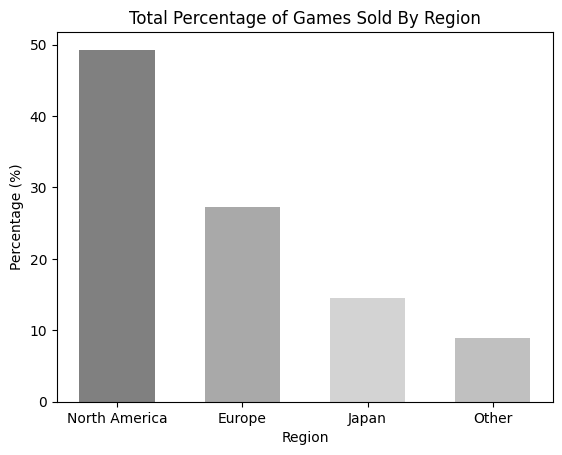


       NA_Sales  EU_Sales  JP_Sales  Other_Sales
0         41.49     29.02      3.77         8.46
1         29.08      3.58      6.81         0.77
2         15.85     12.88      3.79         3.31
3         15.75     11.01      3.28         2.96
4         11.27      8.89     10.22         1.00
...         ...       ...       ...          ...
16593      0.01      0.00      0.00         0.00
16594      0.01      0.00      0.00         0.00
16595      0.00      0.00      0.00         0.00
16596      0.00      0.01      0.00         0.00
16597      0.01      0.00      0.00         0.00

[16598 rows x 4 columns]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# reading the excel file
totalsales = pd.read_excel(r'path\game_sales_data.xlsx', sheet_name = 'TotalSalesRegion')

# total sum from NA column
sumna = (totalsales['NA_Sales'].sum())

# total sum from EU column
sumeu = (totalsales['EU_Sales'].sum())

# total sum from JP column
sumjp = (totalsales['JP_Sales'].sum())

# total sum from Other column
sumot = (totalsales['Other_Sales'].sum())

# total sum of ALL the columns
sumtotal = sumna + sumeu + sumjp + sumot

# Percentage of sales per region
percna = (sumna / sumtotal) * 100 
perceu = (sumeu / sumtotal) * 100 
percjp = (sumjp / sumtotal) * 100  
percot = (sumot / sumtotal) * 100

# printing results
print(f'Sum NA Sales (in millions): {sumna:.2f}\n')
print(f'Sum EU Sales (in millions): {sumeu:.2f}\n')
print(f'Sum JP Sales (in millions): {sumjp:.2f}\n')
print(f'Sum Other Sales (in millions): {sumot:.2f}\n')
print(f'Total Sales globally (in millions): {sumtotal:.2f}\n')

# percentage per region
print(f'Percentage of NA Sales: {percna:.2f}''%')
print(f'Percentage of EU Sales: {perceu:.2f}''%')
print(f'Percentage of JP Sales: {percjp:.2f}''%')
print(f'Percentage of Other Sales: {percot:.2f}''%')

# bar chart
y = [percna, perceu, percjp, percot]
x = ['North America', 'Europe', 'Japan', 'Other']
colors = ['#808080', '#A9A9A9', '#D3D3D3', '#C0C0C0']
plt.bar(x, y, width = 0.6, color = colors)
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Total Percentage of Games Sold By Region')
plt.show()


# printing the excel sheet
print(f'\n{totalsales}')

## 50 Most Sold Games

In [30]:
# reading the excel file and importing the specific sheet
mostsoldgame = pd.read_excel(r'path\game_sales_data.xlsx', sheet_name = 'MostSoldGame', nrows = 50)

# total sum from the columns
mostsoldgame['Total Sales'] = mostsoldgame['NA_Sales'] + mostsoldgame['EU_Sales'] + mostsoldgame['JP_Sales'] + mostsoldgame['Other_Sales']

# Storing the columns 'Name' and 'Total Sales' in a list
names = mostsoldgame['Name'].tolist()
tsales = mostsoldgame['Total Sales'].tolist()

# Creating a new sheet with the two new lists
sheet = pd.DataFrame({
    'Game Name' : names,
    'Total Sales' : tsales
})

print(sheet)

                                       Game Name  Total Sales
0                                     Wii Sports        82.74
1                              Super Mario Bros.        40.24
2                                 Mario Kart Wii        35.83
3                              Wii Sports Resort        33.00
4                       Pokemon Red/Pokemon Blue        31.38
5                                         Tetris        30.26
6                          New Super Mario Bros.        30.01
7                                       Wii Play        29.01
8                      New Super Mario Bros. Wii        28.61
9                                      Duck Hunt        28.31
10                                    Nintendogs        24.75
11                                 Mario Kart DS        23.43
12                   Pokemon Gold/Pokemon Silver        23.09
13                                       Wii Fit        22.72
14                                  Wii Fit Plus        22.00
15      

## Top 50 Publishers That Had More Game Titles Released

In [32]:
# reading the excel file
msreleased = pd.read_excel(r'path\game_sales_data.xlsx', sheet_name = 'MostSoldPublisher')

# total sum of the columns
msreleased['Total Sales'] = msreleased['NA_Sales'] + msreleased['EU_Sales'] + msreleased['JP_Sales'] + msreleased['Other_Sales']

# counting the occurrences of the 50 most appeared publishers
releases = msreleased['Publisher'].value_counts()
print(releases.head(50))
    

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Game Studios                     189
D3Publisher  

## What Genre Was the Most Sold

           Genre  Total Sales
0         Action      1749.90
10        Sports      1330.54
8        Shooter      1036.84
7   Role-Playing       927.26
4       Platform       831.04
3           Misc       809.30
6         Racing       731.77
2       Fighting       448.94
9     Simulation       391.91
5         Puzzle       244.42
1      Adventure       237.59
11      Strategy       174.86


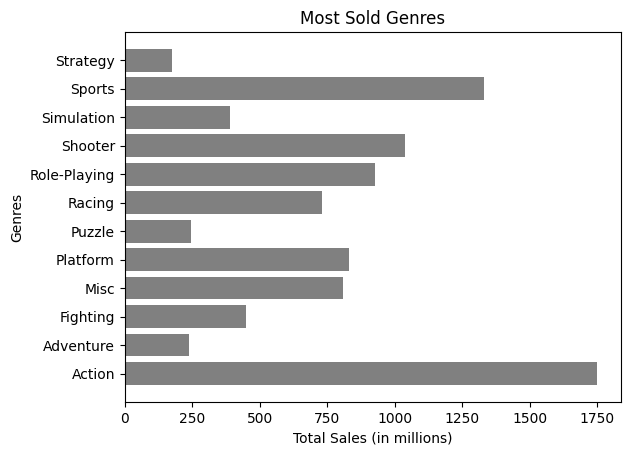

In [37]:
# reading the excel file
msgenre = pd.read_excel(r'path\game_sales_data.xlsx', sheet_name = 'MostSoldGenre')

# total sum of the columns
msgenre['Total Sales'] = msgenre['NA_Sales'] + msgenre['EU_Sales'] + msgenre['JP_Sales'] + msgenre['Other_Sales']

# combining duplicate Genres and summing the column Total Values
summ = msgenre.groupby('Genre')['Total Sales'].sum().reset_index()
print(summ.sort_values('Total Sales', ascending = False))

# creating a graph
plt.barh(summ['Genre'], summ['Total Sales'], color = 'grey')

# Defining x Axis and it's rotation
plt.xlabel('Total Sales (in millions)')
plt.xticks()

# Defining y axis
plt.ylabel('Genres')

# Giving the Graph a tile
plt.title('Most Sold Genres')

# showing the graph
plt.show()
    

## Top 20 Publishers Who Sold More Copies

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Reading the Excel file
mssales = pd.read_excel(r'path\game_sales_data.xlsx', sheet_name = 'MostSoldPublisher')

# Summing the total of sales from the publishers
mssales['Total Sales'] = mssales['NA_Sales'] + mssales['EU_Sales'] + mssales['JP_Sales'] + mssales['Other_Sales']

# Grouping the Publishers and their sales (from biggest to smallest)
newtable = mssales.groupby('Publisher')['Total Sales'].sum().reset_index().set_index('Publisher')
print(newtable.sort_values('Total Sales', ascending = False).head(20))


                                        Total Sales
Publisher                                          
Nintendo                                    1786.36
Electronic Arts                             1110.15
Activision                                   727.11
Sony Computer Entertainment                  607.49
Ubisoft                                      474.51
Take-Two Interactive                         399.70
THQ                                          340.65
Konami Digital Entertainment                 283.46
Sega                                         272.95
Namco Bandai Games                           253.91
Microsoft Game Studios                       245.78
Capcom                                       200.73
Atari                                        156.88
Warner Bros. Interactive Entertainment       153.90
Square Enix                                  145.24
Disney Interactive Studios                   119.72
Eidos Interactive                             98.95
LucasArts   